In [2]:
var openDigger = require('../src/open_digger');

# Notebook 手册

该 Notebook 是一个展示如何使用 OpenDigger 进行开源数据分析的示例文档。

## 函数组

OpenDigger 中包含了很多组用于数据分析和展示的函数组，例如 `render`, `label`, `quick`, `index`, `metric`, `relation`, `driver`。

### Render

由于 OpenDigger 使用 JupyterLab 进行数据分析，我们提供了标准的 [`plotyly`](https://plotly.com/javascript/) 接口来绘制各类图形。

可通过 `openDigger.render.plotly(data, config)` 函数使用 plotly 来绘制图形。

可直接使用 Node.js 内置的 `console.table` 函数进行表格绘制。

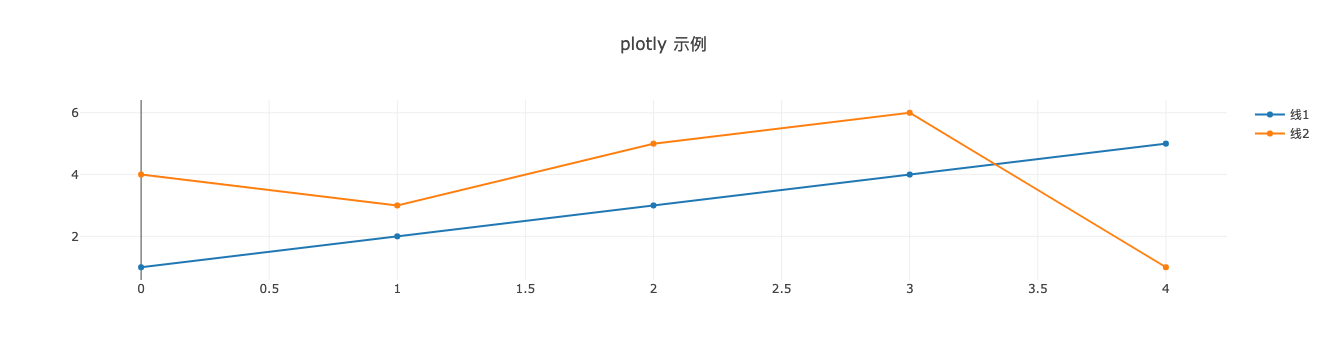

┌─────────┬──────────┬───────┐
│ (index) │   name   │ score │
├─────────┼──────────┼───────┤
│    0    │  '李雷'  │  2.4  │
│    1    │ '韩梅梅' │  3.2  │
└─────────┴──────────┴───────┘


In [2]:
openDigger.render.plotly([{y: [1,2,3,4,5],name: '线1'}, {y: [4,3,5,6,1],name: '线2'}], {title: 'plotly 示例'});
console.table([{name: '李雷', score:2.4}, {name: '韩梅梅',score: 3.2}]);

### Label

OpenDigger 中提供了大量的仓库标签数据，例如公司、基金会、中国项目等。

使用 `openDigger.label.getLabelData()` 获取到所有的标签信息，使用 `openDigger.label.getGitHubData(typeOrIds: string[])` 获取具有特定标签的 GitHub 数据。

`openDigger.label.getLabelData()` 会返回如下的结构的一个数组：

``` javascript
{
    identifier: string;     // 标签的唯一标识，如：companies/alibaba 或 :foundations/apache
    type: string;           // 标签类型信息，如：Company 或 Foundation
    name: string;           // 标签的展示信息，如：Alibaba 或 Apache Software Foundation
    githubRepos: number[];  // 该标签下的所有 GitHub 仓库 ID
    githubOrgs: number[];   // 该标签下的所有 GitHub 组织 ID
    githubUsers: number[];  // 该标签下的所有 GitHub 用户 ID
}
```

`openDigger.label.getGitHubData(typeOrIds: string[])` 函数接受一组标签标识或标签类型，并返回所有具有任意标签标识或标签类型的 GitHub 数据。

In [3]:
var labelData = openDigger.label.getLabelData();
console.log(`OpenDigger 一共包含 ${labelData.length} 个标签标识与 ${new Set(labelData.map(l => l.type)).size} 个标签类型。`);

OpenDigger 一共包含 77 个标签标识与 5 个标签类型。


In [4]:
var data = openDigger.label.getGitHubData(['Foundation', 'Company']);
console.log(`OpenDigger 的公司和基金会标签下一共包含 ${data.githubRepos.length} 个仓库和 ${data.githubOrgs.length} 个组织。`);

OpenDigger 的公司和基金会标签下一共包含 149 个仓库和 234 个组织。


### Quick

#### showAll

`openDigger.quick.showAll(repoName: string, startYear: number = 2015, endYear: number = 2021)` 是一个用于直接展示仓库 `repoName` 在 `startYear` 到 `endYear` 之间的活跃度和 OpenRank 数据的函数。

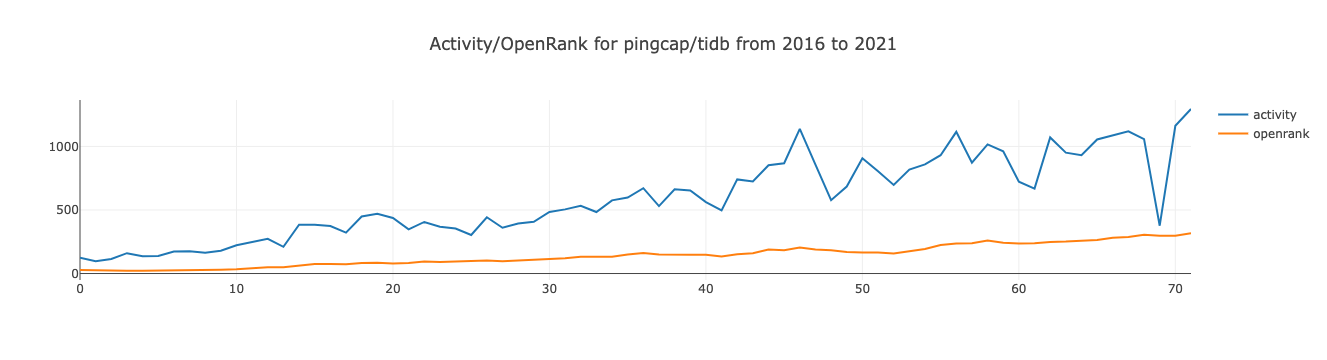

In [5]:
openDigger.quick.showAll('pingcap/tidb', 2016);

### Index

OpenDigger 提供了一组指数实现，用于快速进行数据的分析。

#### 活跃度指数

活跃度指数是由 X-lab 开发的一个基本指数，活跃度指数使用了 GitHub 事件日志中的 `IssueCommentEvent`、 `IssuesEvent`、 `PullRequestEvent` 和 `PullRequestReviewCommentEvent` 事件并进行加权求和。

可使用 `openDigger.index.activity.getRepoActivity(config)` 函数获取特定项目的活跃度指数。

`config` 的配置结构如下：

``` javascript
{
    labelUnion?: string[];                       // 获取包含其中任一标签的所有仓库
    labelIntersect?: string[];                   // 获取包含其中所有标签的所有仓库
    repoIds?: number[];                          // 特定的仓库 ID 数组
    repoNames?: string[];                        // 特定的仓库名数组
    orgIds?: number[];                           // 特定的组织 ID 数组
    orgNames?: string[];                         // 特定的组织名数组
    userIds?: number[];                          // 特定的用户 ID 数组，用于用户类查询
    userLogins?: string[];                       // 特定的用户名数组，用于用户类查询
    startYear?: number = 2015;                   // 查询数据的起始年份，默认为：2015
    startMonth?: number = 1;                     // 查询数据的起始月份，默认为：1
    endYear?: number = current_year;             // 查询数据的结束年份，默认为：当前年份
    endMonth?: number = last_month;              // 查询数据的结束月份，默认为：当前月份的上个月
    order?: 'DESC' | 'ASC' = 'DESC';             // 返回数据的排序方式：DESC 或 ASC，默认为：DESC
    limit?: number = 10;                         // 返回数据的数量，默认为：10
    percision?: number = 2;                      // 返回浮点类数据的小数点后精度，默认为：2
    groupBy?: 'org' | string;                    // 仓库数据的聚合方式，org 或任意标签类型，默认为空，则按仓库返回
    groupTimeRange?: 'month' | 'season' | 'year';// 指数或度量项在时间上的聚合方式，月度、季度或年度，默认全部聚合
}
```

> ***该配置将用于所有指数和度量项的查询。***

通过修改配置参数理论上可以满足各类的数据分析需求。

- getRepoActivity

该函数会根据配置参数返回仓库的活跃度。

下面这个示例展示了 2015 到 2021 年之间所有中国项目按照公司聚合的年度活跃度数据，并使用 plotly 绘制。

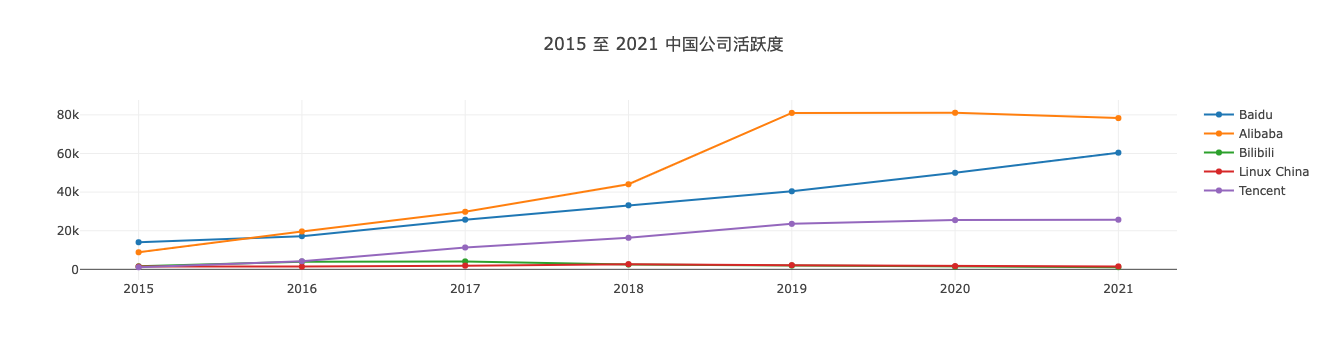

In [6]:
var startYear = 2015, startMonth = 1, endYear = 2021, endMonth = 12, x = [];
for (let y = startYear; y <= endYear; y++) x.push(`${y}`);
openDigger.index.activity.getRepoActivity({labelIntersect: ['Company', ':regions/China'], startYear, startMonth, endYear, endMonth, groupBy: 'Company', groupTimeRange: 'year', limit: 5}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return { x, y: row.activity, mode: 'scatter', name: row.label };
    }), {title: `${startYear} 至 ${endYear} 中国公司活跃度`, xaxis: {type: 'category'}});
});

- getUserActivity

该函数会根据配置参数返回用户的活跃度。

下面这个示例展示了 2015 到 2021 年之间 k8s-ci-robot 和 vscode-triage-bot 这两个账号年度活跃度变化趋势。

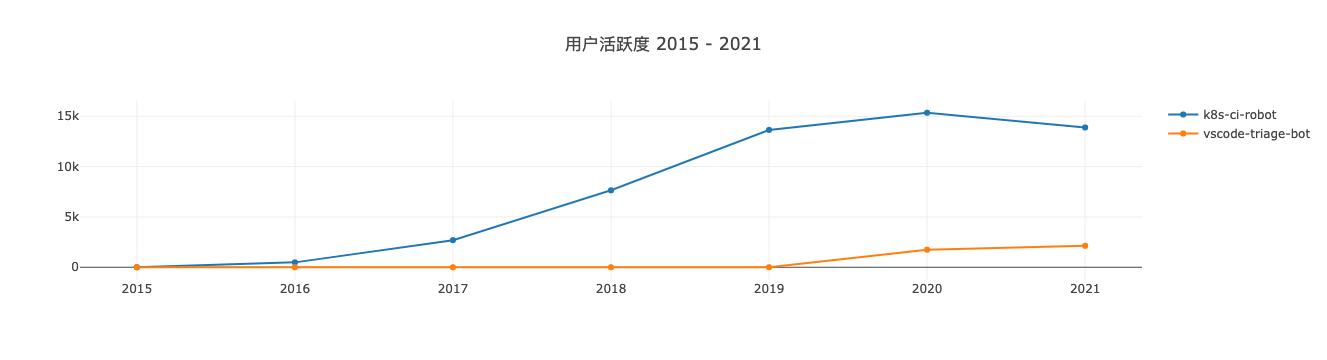

In [7]:
var startYear = 2015, startMonth = 1, endYear = 2021, endMonth = 12, x = [];
for (let y = startYear; y <= endYear; y++) x.push(`${y}`);
openDigger.index.activity.getUserActivity({userLogins: ['k8s-ci-robot', 'vscode-triage-bot'], startYear, startMonth, endYear, endMonth, groupTimeRange: 'year'}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return { x, y: row.activity, mode: 'scatter', name: row.user_login };
    }), {title: `用户活跃度 ${startYear} - ${endYear}`, xaxis: {type: 'category'}});
});

#### OpenRank

OpenRank 指数是由 X-lab 开发的一个图指标。OpenRank 使用活跃度为基础数据构建出 GitHub 全域的协作开发网络，以开发者和仓库为节点，活跃关系为边。

OpenRank 使用一种支持异质图的类 PageRank 算法—— HINRank 对全域的开发者和仓库进行同时排序，用以找到开源世界中重要的开发者和项目。

- getRepoOpenrank

该函数会根据配置参数返回仓库的 OpenRank 值。

下面这个示例展示了 2015 到 2021 年之间所有中国捐献到基金会的项目按照基金会聚合的年度 OpenRank 数据，并使用 plotly 绘制。

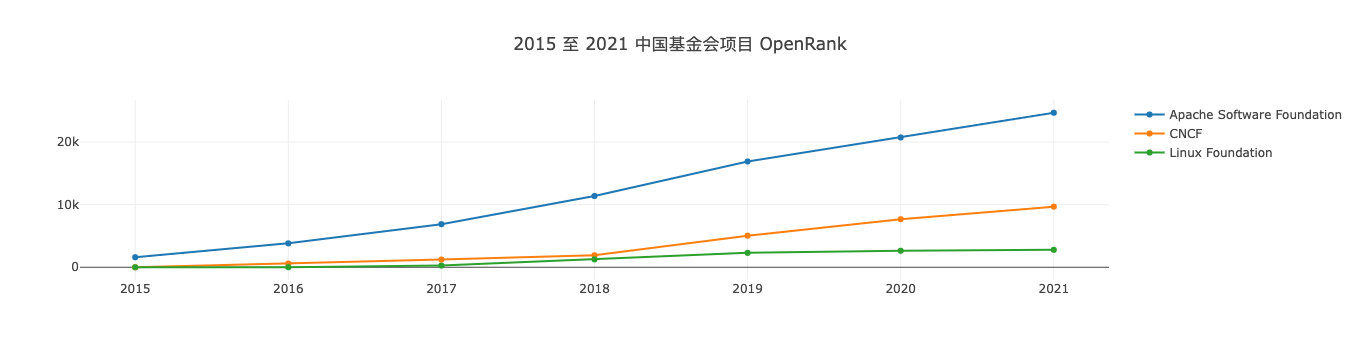

In [8]:
var startYear = 2015, startMonth = 1, endYear = 2021, endMonth = 12, x = [];
for (let y = startYear; y <= endYear; y++) x.push(`${y}`);
openDigger.index.openrank.getRepoOpenrank({labelIntersect: ['Foundation', ':regions/China'], startYear, startMonth, endYear, endMonth, groupBy: 'Foundation', groupTimeRange: 'year', limit: 5}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return { x, y: row.open_rank, mode: 'scatter', name: row.label };
    }), {title: `${startYear} 至 ${endYear} 中国基金会项目 OpenRank`, xaxis: {type: 'category'}});
});

- getUserOpenrank

该函数会根据配置参数返回用户的 OpenRank 值。

下面这个示例展示了 2015 到 2021 年之间 k8s-ci-robot 和 vscode-triage-bot 这两个账号年度 OpenRank 值的变化趋势。

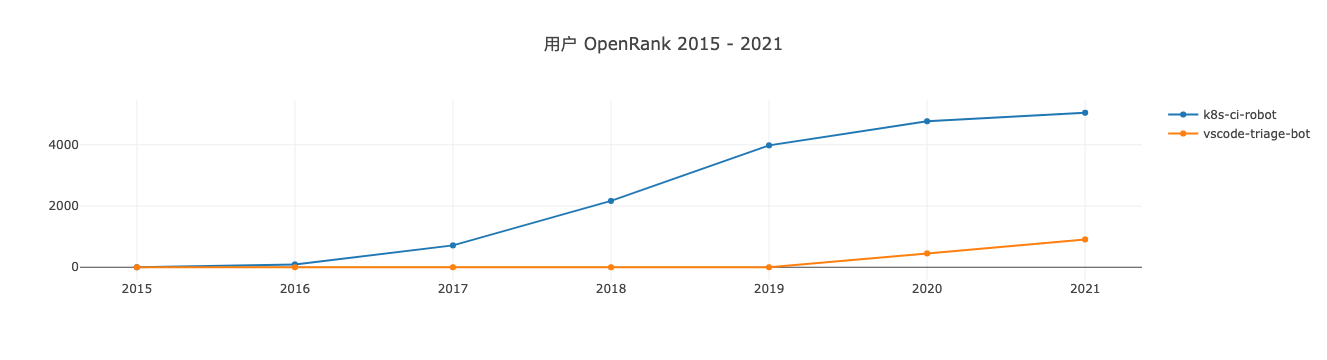

In [9]:
var startYear = 2015, startMonth = 1, endYear = 2021, endMonth = 12, x = [];
for (let y = startYear; y <= endYear; y++) x.push(`${y}`);
openDigger.index.openrank.getUserOpenrank({userLogins: ['k8s-ci-robot', 'vscode-triage-bot'], startYear, startMonth, endYear, endMonth, groupTimeRange: 'year'}).then(data => {
    openDigger.render.plotly(data.map(row => {
        return { x, y: row.open_rank, mode: 'scatter', name: row.user_login };
    }), {title: `用户 OpenRank ${startYear} - ${endYear}`, xaxis: {type: 'category'}});
});

### Metric

OpenDigger 同时提供了一组度量项用于深入观察项目状态。

大部分度量项来自于 CHAOSS 社区。

#### Issues New

Issues new 是一个来自 CHAOSS 的指标，请参考 https://chaoss.community/metric-issues-new/ 。

公司 Microsoft 的 Issues New 度量的创建比例为 ["2.8%","8.6%","12%","13%","18%","24%","21%"]


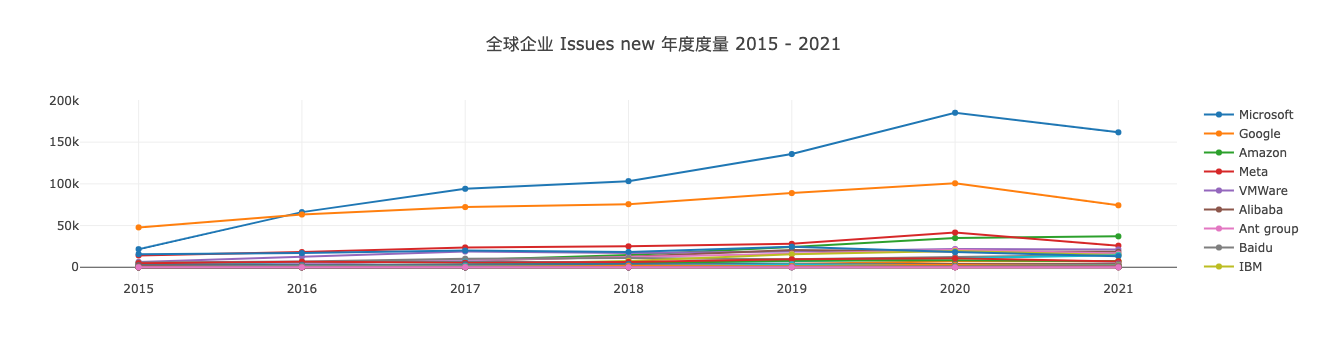

In [4]:
var startYear = 2015, startMonth = 1, endYear = 2021, endMonth = 12, x = [];
for (let y = startYear; y <= endYear; y++) x.push(`${y}`);
openDigger.metric.chaoss.issuesNew({ labelIntersect: ['Company'], startYear, startMonth, endYear, endMonth, groupBy: 'Company', groupTimeRange: 'year', limit: -1 }).then(data => {
    console.log(`公司 ${data[0].name} 的 Issues New 度量的创建比例为 ${JSON.stringify(data[0].ratio)}`);
    openDigger.render.plotly(data.filter(row => row.name != 'Others').map(row => {
        return {
            x,
            y: row.count,
            mode: 'scatter',
            name: row.name
        };
    }), {title: `全球企业 Issues new 年度度量 ${startYear} - ${endYear}`, xaxis: {type: 'category'}});
});

### Driver

OpenDigger 同样提供了可以直接与数据库通信的接口，可以直接使用 SQL 请求进行定制化的分析。

#### Clickhouse

Clickhouse 接口用于直接与 2015 至今的 GitHub 全量事件日志数据进行交互。

可以通过 `openDigger.driver.clickhouse.query(sql: string)` 函数来请求数据。

下面的示例是使用 Clickhouse 数据查询 2015 到 2021 年之间每年日志数量的方法。

[
  { count: '206272514', year: 2015 },
  { count: '311732655', year: 2016 },
  { count: '408629028', year: 2017 },
  { count: '474573090', year: 2018 },
  { count: '599136743', year: 2019 },
  { count: '855451825', year: 2020 },
  { count: '977172023', year: 2021 }
]


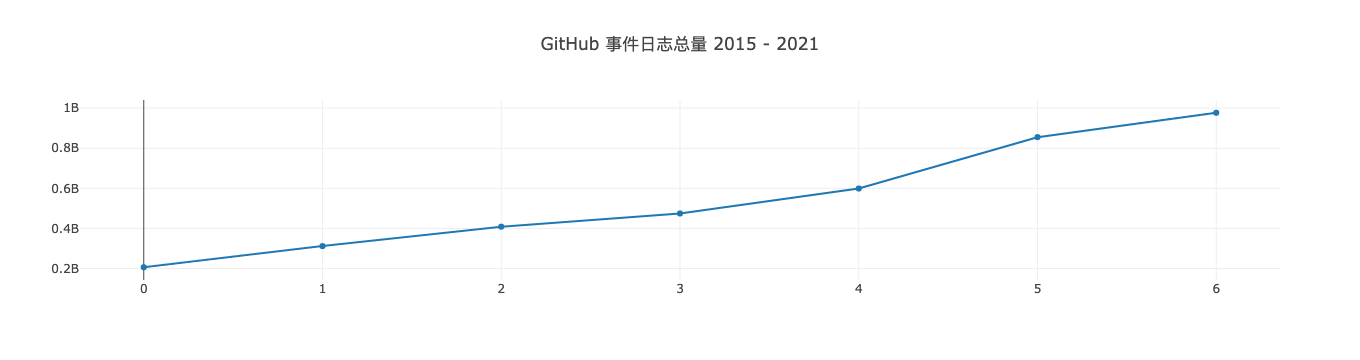

In [3]:
var startYear = 2015, endYear = 2021;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
openDigger.driver.clickhouse.query(`SELECT COUNT() AS count, toYear(created_at) AS year FROM github_log.events WHERE year >= ${startYear} AND year <= ${endYear} GROUP BY year ORDER BY year`).then(data => {
    console.log(data);  // 直接打印数据
    openDigger.render.plotly([
        {y: data.map(d => d.count), mode: 'lines+markers', name: 'log_count'}
    ], {title: `GitHub 事件日志总量 ${startYear} - ${endYear}`});  // 使用 Plotly 绘图
});

#### Neo4j

Neo4j 接口用于图数据交互，图数据中的活跃度与 OpenRank 按月聚合计算，时间区间与 Clickhouse 数据保持一致。

可通过 `openDigger.driver.neo4j.query(sql: string)` 函数来请求数据。

下面的示例是使用 Neo4j 数据查询 alibaba 组织下 2021 年每月 OpenRank 总值的方法。

[
  {
    open_rank_20211: 1378.2449947086238,
    open_rank_20212: 1205.9290687883301,
    open_rank_20213: 1198.0659094044643,
    open_rank_20214: 1309.535816358224,
    open_rank_20215: 1217.7917311759222,
    open_rank_20216: 1308.4420165438437,
    open_rank_20217: 1397.4789267862357,
    open_rank_20218: 1341.1264339608747,
    open_rank_20219: 1290.6398701659832,
    open_rank_202110: 869.2497420097089,
    open_rank_202111: 1147.450127156078,
    open_rank_202112: 1340.6250216589958
  }
]


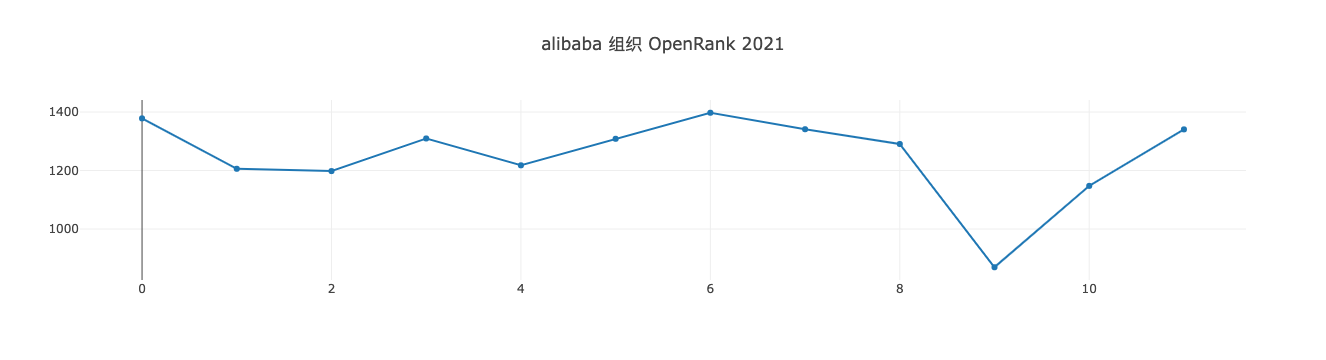

In [11]:
var startMonth = 1, endMonth = 12, org = 'alibaba';
var monthQuery = [];
for (var m = startMonth; m <= endMonth; m++) monthQuery.push(`SUM(COALESCE(r.open_rank_2021${m}, 0.0)) AS open_rank_2021${m}`);
openDigger.driver.neo4j.query(`MATCH (r:Repo) WHERE r.org_login='${org}' RETURN ${monthQuery.join(',')}`).then(data => {
    console.log(data);  // log to console
    openDigger.render.plotly([
        {y: Object.values(data[0]), mode: 'lines+markers', name: 'open_rank'}
    ], {title: `${org} 组织 OpenRank 2021`});  // show the result as image
});